In [173]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [174]:
import numpy as np
import matplotlib.pyplot as plt
import math

In [175]:
CSV_PATH = "/workspace/plane-nerf/outputs/jackal_floor_training_data_1/plane-nerf/2024-03-11_145657/eval_results_2024-03-24_183231.csv"

In [176]:
#Open CSV file as 2d numpy array
csv_data = np.genfromtxt(CSV_PATH, delimiter=',')
#If nan values are present, replace them with 0
csv_data = np.nan_to_num(csv_data)
iteration = csv_data[:, 0::3]
translation = csv_data[:, 1::3]
rotation = csv_data[:, 2::3]


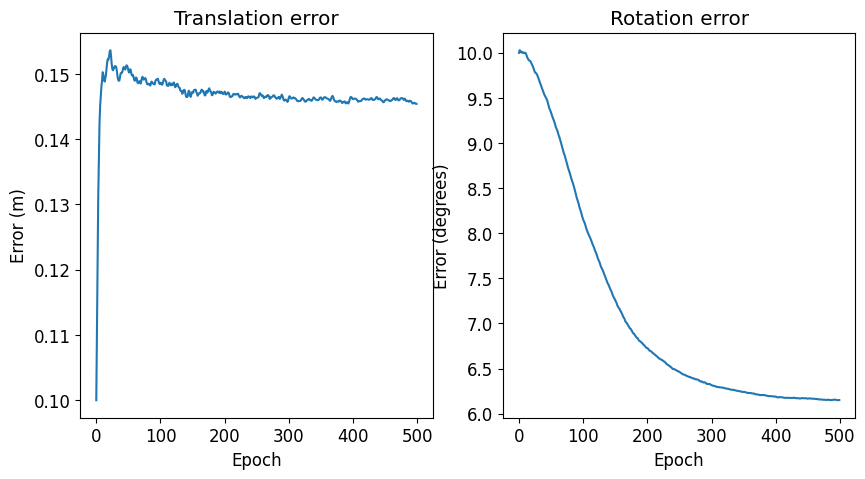

In [177]:
#Plot mean of translation and rotation error separately

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(translation.mean(axis=0))
plt.title("Translation error")
plt.xlabel("Epoch")
plt.ylabel("Error (m)")

plt.subplot(1, 2, 2)
plt.plot(rotation.mean(axis=0) * 180 / math.pi)
plt.title("Rotation error")
plt.xlabel("Epoch")
plt.ylabel("Error (degrees)")

plt.show()

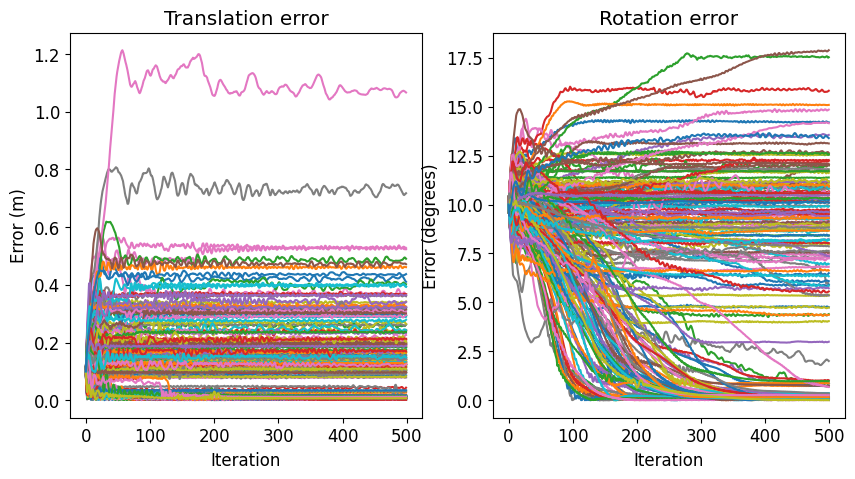

In [178]:
#Plot mean of translation and rotation error of a specific arrays of rows
row = [i for i in range(len(csv_data))]

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(translation[row].T)
plt.title("Translation error")
plt.xlabel("Iteration")
plt.ylabel("Error (m)")

plt.subplot(1, 2, 2)
plt.plot(rotation[row].T * 180 / math.pi)
plt.title("Rotation error")
plt.xlabel("Iteration")
plt.ylabel("Error (degrees)")

plt.show()

Final translation error: 0.14542860523217202 m
Final rotation error: 6.1505642280216595 degrees
Standard deviation of final translation error: 0.15360879050144904 m
Standard deviation of final rotation error: 5.01543060022533 degrees
[0.35  0.045 0.15  0.115 0.065 0.04 ] [0.   0.05 0.1  0.15 0.2  0.25]
[0.365, 0.275, 0.245, 0.02, 0.0, 0.0] [0, 5, 10, 15, 20, 25]


(0.0, 1.0)

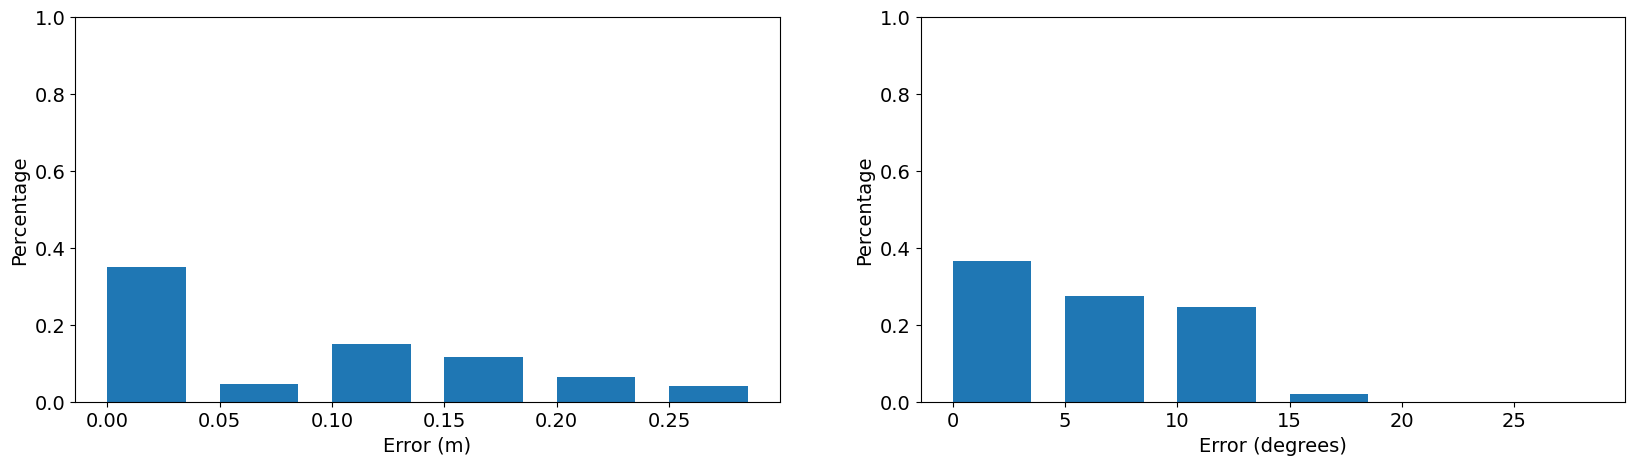

In [182]:
final_translation_error = translation[:,-1]
final_rotation_error = rotation[:,-1]
print(f"Final translation error: {final_translation_error.mean()} m")
print(f"Final rotation error: {final_rotation_error.mean() * 180 / math.pi} degrees")

#Find standard deviation of final translation and rotation error
print(f"Standard deviation of final translation error: {final_translation_error.std()} m")
print(f"Standard deviation of final rotation error: {final_rotation_error.std() * 180 / math.pi} degrees")

#Plot 3 graphs for PSNR, SSIM, LPIPS side by side
fig, axs = plt.subplots(1, 2, figsize=(20, 5))

#Increase font size
plt.rcParams.update({'font.size': 12})

#Increase font size of axis
for ax in axs:
    for item in ([ax.title, ax.xaxis.label, ax.yaxis.label] +
                 ax.get_xticklabels() + ax.get_yticklabels()):
        item.set_fontsize(14)

#Plot histogram of final translation and rotation error

bin = []
percentage = []
cnt = 6
for x in range(cnt):
    i = x * 0.05
    bin.append(i)
    percentage.append(len(final_translation_error[(final_translation_error >= i) & (final_translation_error < i+0.05)])/200)

bin = np.array(bin)
percentage = np.array(percentage)

print(percentage,bin)

bar_width = np.array([0.05] * cnt) * 0.7

axs[0].bar(bin, percentage, width=bar_width, align="edge")
axs[0].set_xlabel("Error (m)")
axs[0].set_ylabel("Percentage")
axs[0].set_ylim(0, 1)

bin = []
percentage = []
cnt = 6
for x in range(cnt):
    i = x * 5
    bin.append(i)
    percentage.append(len(final_rotation_error[(final_rotation_error/math.pi *180 >= i) & (final_rotation_error/math.pi*180 < i+5)])/200)

print(percentage,bin)

bar_width = np.array([5] * cnt) * 0.7

axs[1].bar(bin, percentage, width=bar_width, align="edge")
axs[1].set_xlabel("Error (degrees)")
axs[1].set_ylabel("Percentage")
axs[1].set_ylim(0, 1)


(0.0, 500.0)

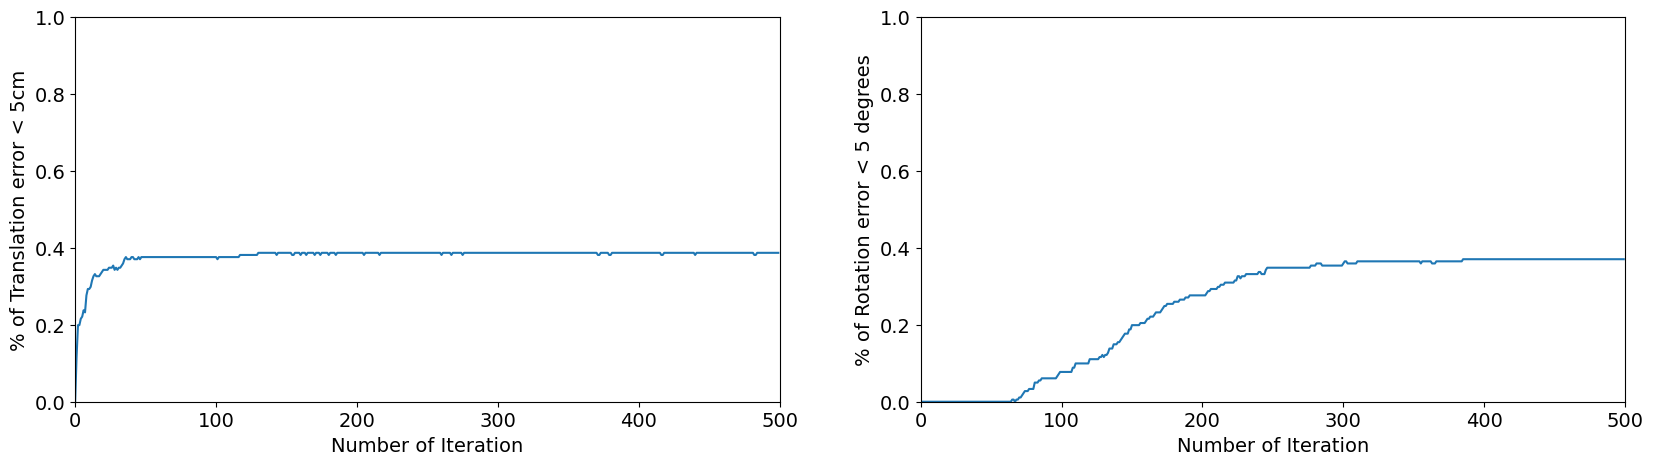

In [180]:
#Plot 3 graphs for PSNR, SSIM, LPIPS side by side
fig, axs = plt.subplots(1, 2, figsize=(20, 5))

#Increase font size
plt.rcParams.update({'font.size': 12})

#Increase font size of axis
for ax in axs:
    for item in ([ax.title, ax.xaxis.label, ax.yaxis.label] +
                 ax.get_xticklabels() + ax.get_yticklabels()):
        item.set_fontsize(14)

#Draw ratio that falls below 5 cm 5 degrees against iteration
axs[0].plot((translation < 0.05).mean(axis=0))
axs[0].set_ylabel("% of Translation error < 5cm")
axs[0].set_xlabel("Number of Iteration")
axs[0].set_ylim(0, 1)
axs[0].set_xlim(0,500)

axs[1].plot(((rotation < 0.05).mean(axis=0)))
axs[1].set_ylabel("% of Rotation error < 5 degrees")
axs[1].set_xlabel("Number of Iteration")
axs[1].set_ylim(0, 1)
axs[1].set_xlim(0,500)

In [181]:
#Find index of the worst performing model
worst_translation_index = np.argmax(final_translation_error)
worst_rotation_index = np.argmax(final_rotation_error)

print(f"Worst performing model for translation error: {worst_translation_index}")
print(f"Worst performing model for rotation error: {worst_rotation_index}")

Worst performing model for translation error: 116
Worst performing model for rotation error: 165
